In [6]:
!python3 run_deepseek_mmlu_test.py --quantization fp16 int8 int4

/opt/rocm/lib/libamd_smi.so: cannot open shared object file: No such file or directory
Unable to find libamd_smi.so library try installing amd-smi-lib from your package manager
Patched missing nvmlFieldValue_t struct.
Patched missing NVML_FI_DEV_POWER_INSTANT with TOTAL_ENERGY_CONSUMPTION.

===== MMLU Benchmark Setup =====
Model: deepseek-ai/deepseek-coder-1.3b-base
Quantization modes: fp16, int8, int4
Subjects: high_school_mathematics, high_school_physics
Max samples: 50
Output directory: results

===== GPU Information =====
CUDA available: True
CUDA device count: 1
CUDA device name: Tesla T4
GPU Memory: Allocated: 0.00 GB | Reserved: 0.00 GB | Max: 0.00 GB

===== Running MMLU Benchmark =====
Location detected: São Paulo, BR (lat: -23.5475, lon: -46.6361)
Using estimated carbon intensity.
Using estimated carbon intensity for BR: 110 gCO2eq/kWh
Carbon intensity: 110 gCO2eq/kWh

----- Testing FP16 Mode -----
Starting to load classifier in FP16 mode...
GPU Memory: Allocated: 0.00 GB | Re

Drawing for FP16...


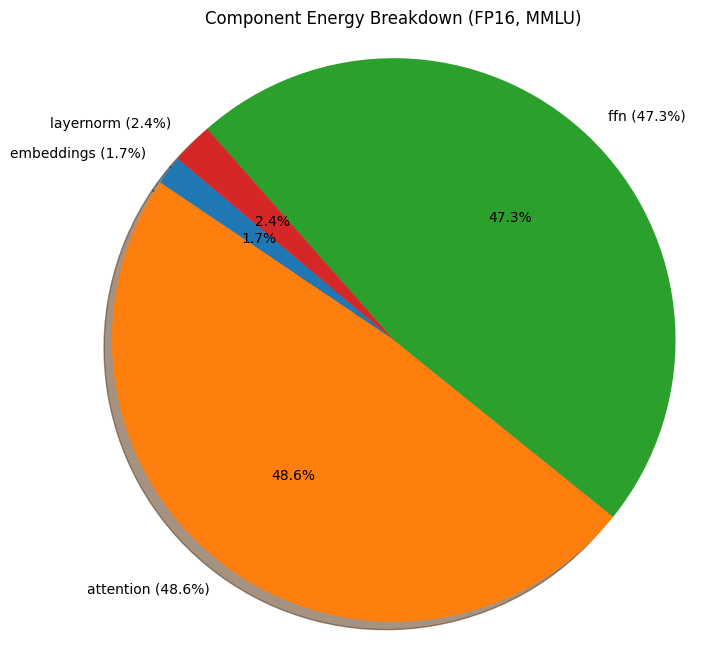

Drawing for INT8...


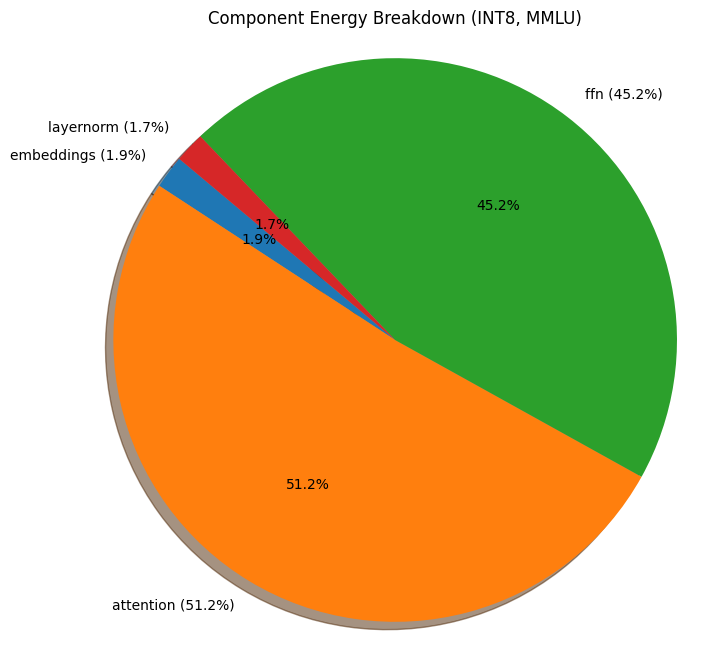

Drawing for INT4...


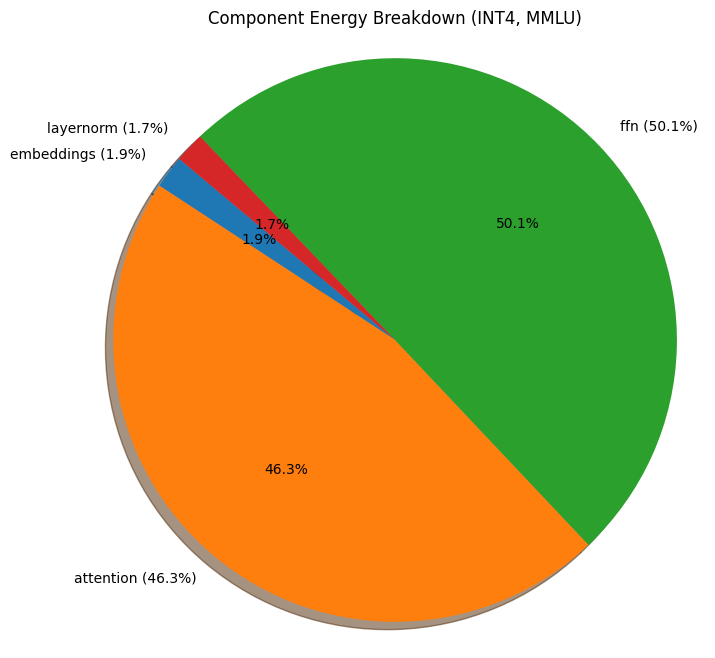

In [14]:
import matplotlib.pyplot as plt
import json

# Load the results
with open('results/mmlu_results_20250427_195306.json', 'r') as f:
    raw = json.load(f)

# Modes you want to plot
modes = ['fp16', 'int8', 'int4']

# Loop over each quantization mode
for mode in modes:
    if mode not in raw:
        print(f"Skipping {mode}: no data found.")
        continue
    
    print(f"Drawing for {mode.upper()}...")

    # Extract component energy dictionary
    component_energy = raw[mode]['component_energy']

    # Remove components with zero energy
    component_energy = {k: v for k, v in component_energy.items() if v > 0}

    # Prepare labels and sizes
    labels = [f"{k} ({v / sum(component_energy.values()) * 100:.1f}%)" for k, v in component_energy.items()]
    sizes = list(component_energy.values())

    # Draw PIE plot
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, shadow=True)
    plt.title(f'Component Energy Breakdown ({mode.upper()}, MMLU)')
    plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
    plt.show()


In [4]:
raw

{'int4': {'benchmark': 'mmlu',
  'score': 0.05,
  'total_energy': 930.6620000000257,
  'energy_per_token': 0.36353984375001,
  'throughput': 121.9667669465466,
  'total_time': 20.98932409286499,
  'total_tokens': 2560,
  'component_energy': {'embeddings': 10065.432470245842,
   'attention': 289623.32852605917,
   'ffn': 314088.6066125804,
   'layernorm': 11922.770591757531,
   'output_layer': 0.0},
  'subject_metrics': {},
  'carbon_emissions': 28.436894444445233}}